# <center>M82 X-2 ESO Project<center>

## <center> 1. Aligning M82-X2 filter K images<center>

In [1]:
import astroalign as aa 

from astropy.io import fits
from astropy.io.fits import update
import numpy as np
import matplotlib.pyplot as plt
from ccdproc import ImageFileCollection
from ccdproc.utils.sample_directory import sample_directory_with_files
from pathlib import Path
from astropy.nddata import CCDData

%matplotlib inline

In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Upload the files from our directory:

In [3]:
# Files of observations used in this example 
directory = '/Users/alba/Desktop/ESO/Data/KOA_118904/NIRC2/calibrated/'

In [4]:
filelist = !ls $directory/*.fits.gz

In [5]:
p = Path(directory) #Para ubicarnos en ese directorio
filelist = list(sorted(p.glob('*.fits.gz')))
print(f'Total number of files: {len(filelist)}')
print(filelist[0:2])    # printing only from 10 to 19

Total number of files: 96
[PosixPath('/Users/alba/Desktop/ESO/Data/KOA_118904/NIRC2/calibrated/N2.20150131.30386_drp.fits.gz'), PosixPath('/Users/alba/Desktop/ESO/Data/KOA_118904/NIRC2/calibrated/N2.20150131.30551_drp.fits.gz')]


In [6]:
HDUList_object = fits.open(filelist[2])
HDUList_object.info()

Filename: /Users/alba/Desktop/ESO/Data/KOA_118904/NIRC2/calibrated/N2.20150131.30745_drp.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     268   (1024, 1024)   float32   


In [7]:
primary_HDU = HDUList_object[0]

In [8]:
# Extract primary header
primary_header = primary_HDU.header

In [9]:
HDUList_object.close()

We print the name for each file

In [10]:
error=0
print('File','     Object','   Filter','NAXIS1','NAXIS2')
for fname in filelist:
    with fits.open(fname) as HDUList_object:
        primary_header = HDUList_object[0].header
    print(primary_header['FILENAME'],primary_header['OBJECT']  ,primary_header['FILTER'],primary_header['NAXIS1'],primary_header['NAXIS2'])

File      Object    Filter NAXIS1 NAXIS2
n0230.fits tt004A Kp + clear 1024 1024
n0231.fits M82 Kp + clear 1024 1024
n0232.fits M82 Kp + clear 1024 1024
n0233.fits M82 Kp + clear 1024 1024
n0234.fits M82 Kp + clear 1024 1024
n0235.fits M82 Kp + clear 1024 1024
n0236.fits M82 Kp + clear 1024 1024
n0237.fits M82 Kp + clear 1024 1024
n0238.fits M82 Kp + clear 1024 1024
n0239.fits M82 Kp + clear 1024 1024
n0240.fits M82 Kp + clear 1024 1024
n0241.fits M82 Kp + clear 1024 1024
n0242.fits M82 Kp + clear 1024 1024
n0243.fits M82 Kp + clear 1024 1024
n0244.fits M82 Kp + clear 1024 1024
n0245.fits M82 Kp + clear 1024 1024
n0246.fits M82 Kp + clear 1024 1024
n0247.fits M82 Kp + clear 1024 1024
n0248.fits M82 Kp + clear 1024 1024
n0249.fits M82 Kp + clear 1024 1024
n0250.fits M82 Kp + clear 1024 1024
n0251.fits M82 Kp + clear 1024 1024
n0252.fits M82 Kp + clear 1024 1024
n0253.fits M82 Kp + clear 1024 1024
n0254.fits M82 Kp + clear 1024 1024
n0255.fits M82 Kp + clear 1024 1024
n0256.fits M82 Kp + 

### Separate filter K

Now we have to separate images per filter...

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
keys = ['imagetyp','OBJECT' , 'EXPTIME' , 'INSFLID' , 'INSFLNAM','FILTER']
ic1 = ImageFileCollection(directory, glob_include='*.fits.gz', keywords=keys)

In [13]:
matches = (ic1.summary['FILTER'] == 'Kp + clear') 

In [14]:
K_files = ic1.summary['file'][matches]


open them...

In [15]:
%cd /Users/alba/Desktop/ESO/Data/KOA_118904/NIRC2/calibrated/
image = []
for file in K_files:
    image.append(CCDData.read(file,unit="adu"))

/Users/alba/Desktop/ESO/Data/KOA_118904/NIRC2/calibrated


In [16]:
image[2].header

SIMPLE  =                    T / Written by IDL:  Sat Jan 31 10:55:02 2015      
BITPIX  =                  -32 / IEEE single precision floating point           
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1024 / Number of pixels in axis 1                     
NAXIS2  =                 1024 / Number of pixels in axis 2                     
BSCALE  =              1.00000 / Scaling factor                                 
BZERO   =              0.00000 / Scaling zero-point                             
OUTDIR  = '/sdata904/nirc10/2015jan31/           ' / Original directory         
ROOTNAME= 'n                 ' / File prefix                                    
FRAMENO =                  232 / Frame number                                   
FILENAME= 'n0232.fits        ' / Original File name                             
TELESCOP= 'Keck II           ' / Telescope                                      
OBSERVER= 'Tendulkar,Piskorz

see their statistics...

In [17]:
print('Filename    Object Filter  exp Mean std min  max')
exposure = []
for i in range(len(image)):
    print(image[i].header['FILENAME'], 
          image[i].header['OBJECT'], 
          image[i].header['Filter'],
          int(np.mean(image[i])), 
          int(np.std(image[i])), 
          np.min(image[i]), 
          np.max(image[i]))

Filename    Object Filter  exp Mean std min  max
n0230.fits tt004A Kp + clear 5050 2284 -24037.2 90077.586
n0231.fits M82 Kp + clear 6399 4508 -23604.777 127108.87
n0232.fits M82 Kp + clear 834 498 -30727.055 9386.905
n0233.fits M82 Kp + clear 836 539 -30751.768 13893.224
n0234.fits M82 Kp + clear 839 534 -30742.85 13524.321
n0235.fits M82 Kp + clear 842 530 -30737.412 11475.912
n0236.fits M82 Kp + clear 844 533 -30732.24 12711.343
n0237.fits M82 Kp + clear 845 527 -30742.129 11946.794
n0238.fits M82 Kp + clear 801 516 -30762.188 14076.096
n0239.fits M82 Kp + clear 805 508 -30760.785 12631.954
n0240.fits M82 Kp + clear 798 489 -30755.408 10448.388
n0241.fits M82 Kp + clear 799 489 -30754.256 10055.482
n0242.fits M82 Kp + clear 869 513 -30595.928 8308.245
n0243.fits M82 Kp + clear 877 546 -30600.898 11843.436
n0244.fits M82 Kp + clear 872 545 -30606.107 13032.369
n0245.fits M82 Kp + clear 873 547 -30609.465 13006.939
n0246.fits M82 Kp + clear 841 552 -30721.348 12889.5205
n0247.fits M82

---------------------------------------
### Example of aligment of two files where we are going to delete cosmic rays

In [18]:
%cd /Users/alba/Desktop/ESO/Data/KOA_118904/NIRC2/calibrated/

file_reference_image = K_files[2]    #2016-04-28
file_original_image  = K_files[5]   #2019-04-11

/Users/alba/Desktop/ESO/Data/KOA_118904/NIRC2/calibrated


In [19]:
HDUList_object = fits.open(file_reference_image)
reference_header  = HDUList_object[0].header
reference_image = HDUList_object[0].data
print('reference image',reference_header['FILENAME'],
      reference_header['DATE-OBS'],'    BITPIX:',reference_header['BITPIX'])
HDUList_object = fits.open(file_original_image)
original_header = HDUList_object[0].header
original_image = HDUList_object[0].data
print('image to align ',original_header['FILENAME'],
      original_header['DATE-OBS'],'  BITPIX:',original_header['BITPIX'])

reference image n0232.fits 2015-01-31     BITPIX: -32
image to align  n0235.fits 2015-01-31   BITPIX: -32


In [20]:
print(reference_image.dtype,original_image.dtype)

>f4 >f4


In [21]:
reference = reference_image.astype('float32') 
original  = original_image.astype('float32') 
print(reference.dtype,original.dtype)

float32 float32


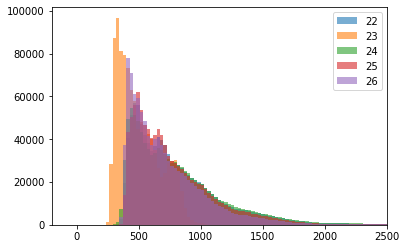

In [22]:
min_v = -200
max_v = 2500

plt.xlim(min_v,max_v)
bins = np.linspace(min_v,max_v,100)
for i in np.arange(22,27):
    plt.hist(image[i].data.flatten(), alpha=0.6, bins=bins,label=i)
plt.legend()
plt.show()

Images 0 and 1 are different...

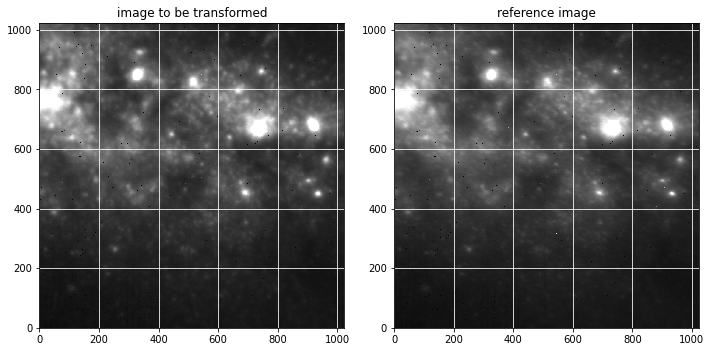

In [23]:
# Displaying the original and the reference image 
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(original,cmap='gray', interpolation='none', origin='lower', vmin=200, vmax=2800)
#axes[0].axis('off')
axes[0].set_title("image to be transformed")
axes[0].grid(color='w')
axes[1].imshow(reference, cmap='gray', interpolation='none', origin='lower', vmin=200, vmax=2800)
#axes[1].axis('off')
axes[1].set_title("reference image")
plt.tight_layout()
axes[1].grid(color='w')
plt.show()

In [24]:
registered_image, footprint = aa.register(original, reference)
#registered_image, footprint = aa.register(clean_source, clean_target, min_area=9)

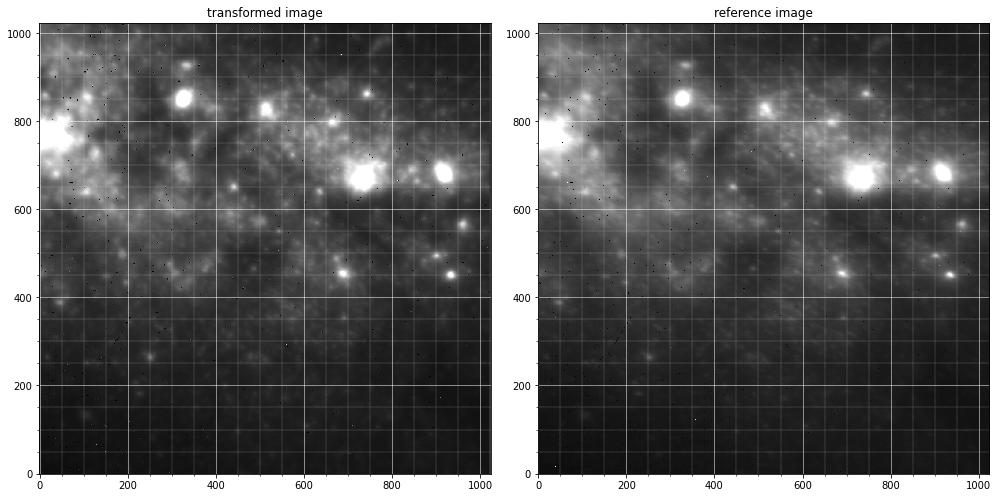

In [25]:
# Displaying the transformed image and the reference image 
fig, axes = plt.subplots(1, 2, figsize=(14, 10))
axes[0].imshow(registered_image, cmap='gray', interpolation='none', origin='lower', vmin=200, vmax=2800)
#axes[0].axis('off')
axes[0].set_title("transformed image")
axes[0].minorticks_on()
axes[0].grid(True,which='major',color='w',linestyle='-',lw=0.5)
axes[0].grid(True,which='minor',color='w',linestyle='--',lw=0.2)
axes[1].imshow(reference, cmap='gray', interpolation='none', origin='lower', vmin=200, vmax=2800)
#axes[1].axis('off')
axes[1].set_title("reference image")
axes[1].minorticks_on()
axes[1].grid(True,which='major',color='w',linestyle='-',lw=0.5)
axes[1].grid(True,which='minor',color='w',linestyle='--',lw=0.2)
plt.tight_layout()

In [26]:
p, (pos_img, pos_img_rot) = aa.find_transform(original,reference)
print("Rotation: {:.2f} degrees".format(p.rotation * 180.0 / np.pi))
print("\nScale factor: {:.2f}".format(p.scale))
print("\nTranslation: (x, y) = ({:.2f}, {:.2f})".format(*p.translation))
print("\nTranformation matrix:\n{}".format(p.params))
print("\nPoint correspondence:")
for (x1, y1), (x2, y2) in zip(pos_img, pos_img_rot):
    print("({:.2f}, {:.2f}) in source --> ({:.2f}, {:.2f}) in target"
          .format(x1, y1, x2, y2))

Rotation: -0.01 degrees

Scale factor: 1.00

Translation: (x, y) = (-3.22, 0.23)

Tranformation matrix:
[[ 9.99346928e-01  1.38049473e-04 -3.21863055e+00]
 [-1.38049473e-04  9.99346928e-01  2.31296516e-01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Point correspondence:
(638.50, 639.43) in source --> (635.52, 639.69) in target
(443.72, 649.94) in source --> (440.81, 649.50) in target
(36.49, 909.33) in source --> (33.10, 907.69) in target
(299.69, 604.37) in source --> (297.04, 604.20) in target
(340.45, 436.56) in source --> (337.09, 436.89) in target
(438.66, 588.23) in source --> (434.46, 588.37) in target
(310.80, 455.37) in source --> (307.53, 455.75) in target
(327.96, 675.67) in source --> (323.94, 674.80) in target
(98.67, 951.63) in source --> (95.86, 951.71) in target
(500.72, 572.21) in source --> (497.13, 572.33) in target
(564.29, 744.47) in source --> (560.36, 744.84) in target
(41.31, 680.60) in source --> (38.67, 679.62) in target
(191.63, 497.44) in source --

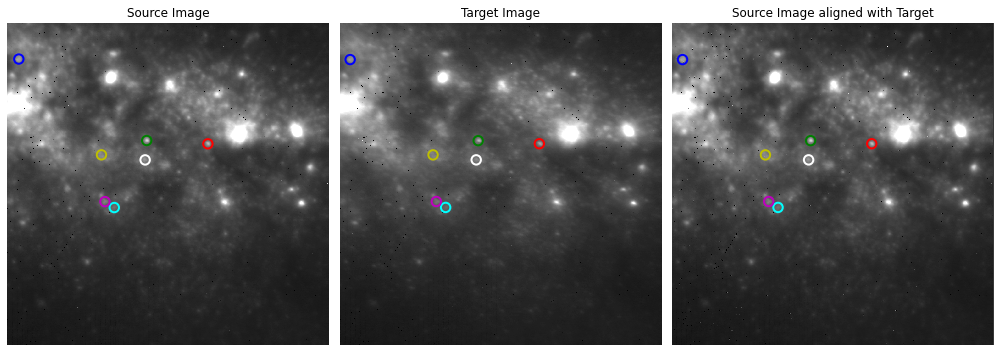

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(14,9))

colors = ['r', 'g', 'b', 'y', 'cyan', 'w', 'm']
vmin,vmax= 100,2900
axes[0].imshow(original, cmap='gray', vmin=vmin,vmax=vmax,interpolation='none', origin='lower')
axes[0].axis('off')
axes[0].set_title("Source Image")
for (xp, yp), c in zip(pos_img[:len(colors)], colors):
    circ = plt.Circle((xp, yp), 15, fill=False, edgecolor=c, linewidth=2)
    axes[0].add_patch(circ)
vmin,vmax= 100,2900
axes[1].imshow(reference, cmap='gray', vmin=vmin,vmax=vmax, interpolation='none', origin='lower')
axes[1].axis('off')
axes[1].set_title("Target Image")
for (xp, yp), c in zip(pos_img_rot[:len(colors)], colors):
    circ = plt.Circle((xp, yp), 15 * p.scale, fill=False, edgecolor=c, linewidth=2)
    axes[1].add_patch(circ)
vmin,vmax= 100,2900
axes[2].imshow(registered_image, cmap='gray', vmin=vmin,vmax=vmax, interpolation='none', origin='lower')
axes[2].axis('off')
axes[2].set_title("Source Image aligned with Target")
for (xp, yp), c in zip(pos_img_rot[:len(colors)], colors):
    circ = plt.Circle((xp, yp), 15 * p.scale, fill=False, edgecolor=c, linewidth=2)
    axes[2].add_patch(circ)

axes[2].axis('off')

plt.tight_layout()

In [28]:
# A new FITS file to contain the registered image is created 
#hdu = fits.PrimaryHDU(registered_image)
#hdul = fits.HDUList([hdu])
#hdul.writeto('afztucmP_0044.fits') # A warning raises when the file already exits

# We use the original image header 
#update('afztucmP_0044.fits', registered_image, original_header)

-----------

### Now we have to do this but for ALL K filter images

In [29]:
%cd /Users/alba/Desktop/ESO/Data/KOA_118904/NIRC2/calibrated/

file_reference_image = K_files[2]    #DO NOT CHANGE
file_original_image  = K_files[3:]   # It starts at 3 because 0,1 are problematic and 2 is the reference one

file_original_image=np.delete(file_original_image,20) #These are images that also give troubles
file_original_image=np.delete(file_original_image,22)
file_original_image=np.delete(file_original_image,33)
file_original_image=np.delete(file_original_image,33)
file_original_image=np.delete(file_original_image,33)
file_original_image=np.delete(file_original_image,33)
file_original_image=np.delete(file_original_image,33)
file_original_image=np.delete(file_original_image,33)



footprint=[]
register_image=[]
original_images=[]
original_headers=[]
for i in np.arange(0,len(file_original_image)):
    
        HDUList_object = fits.open(file_reference_image)
        reference_header  = HDUList_object[0].header
        reference_image = HDUList_object[0].data

        HDUList_object = fits.open(file_original_image[i])
        original_header = HDUList_object[0].header
        original_image = HDUList_object[0].data
    
        reference = reference_image.astype('float32') 
        original  = original_image.astype('float32') 
        original_images.append(original)
        original_headers.append(original_header)
        print(i,file_original_image[i])
        if i==30:
            registered_image=register_image.append(aa.register(original, reference,detection_sigma=2,max_control_points=3)[0])
            foot=footprint.append(aa.register(original, reference,detection_sigma=2,max_control_points=3)[1]) 
        else:
            registered_image=register_image.append(aa.register(original, reference)[0])
            foot=footprint.append(aa.register(original, reference)[1])
    


/Users/alba/Desktop/ESO/Data/KOA_118904/NIRC2/calibrated
0 N2.20150131.30898_drp.fits.gz
1 N2.20150131.31042_drp.fits.gz
2 N2.20150131.31126_drp.fits.gz
3 N2.20150131.31206_drp.fits.gz
4 N2.20150131.31286_drp.fits.gz
5 N2.20150131.31369_drp.fits.gz
6 N2.20150131.31448_drp.fits.gz
7 N2.20150131.31529_drp.fits.gz
8 N2.20150131.31609_drp.fits.gz
9 N2.20150131.31695_drp.fits.gz
10 N2.20150131.31775_drp.fits.gz
11 N2.20150131.31856_drp.fits.gz
12 N2.20150131.31935_drp.fits.gz
13 N2.20150131.32018_drp.fits.gz
14 N2.20150131.32097_drp.fits.gz
15 N2.20150131.32177_drp.fits.gz
16 N2.20150131.32257_drp.fits.gz
17 N2.20150131.32341_drp.fits.gz
18 N2.20150131.32421_drp.fits.gz
19 N2.20150131.32501_drp.fits.gz
20 N2.20150131.32947_drp.fits.gz
21 N2.20150131.33117_drp.fits.gz
22 N2.20150131.33283_drp.fits.gz
23 N2.20150131.33369_drp.fits.gz
24 N2.20150131.33453_drp.fits.gz
25 N2.20150204.39099_drp.fits.gz
26 N2.20150204.39229_drp.fits.gz
27 N2.20150204.39353_drp.fits.gz
28 N2.20150204.39433_drp.fits

**We've transformed them already! Let's see how they look**

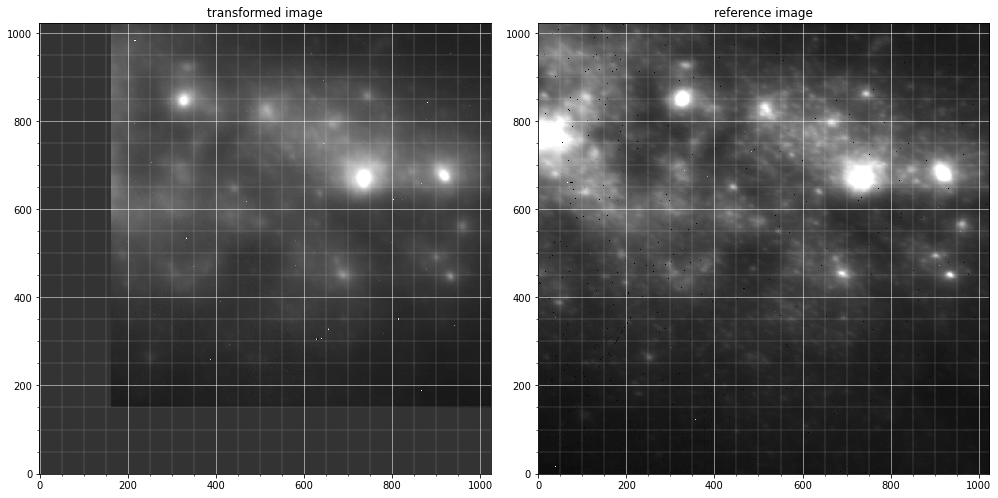

In [30]:
# Displaying the transformed image and the reference image 
fig, axes = plt.subplots(1, 2, figsize=(14, 10))
axes[0].imshow(register_image[30], cmap='gray', interpolation='none', origin='lower', vmin=200, vmax=2800)
#axes[0].axis('off')
axes[0].set_title("transformed image")
axes[0].minorticks_on()
axes[0].grid(True,which='major',color='w',linestyle='-',lw=0.5)
axes[0].grid(True,which='minor',color='w',linestyle='--',lw=0.2)
axes[1].imshow(reference, cmap='gray', interpolation='none', origin='lower', vmin=200, vmax=2800)
#axes[1].axis('off')
axes[1].set_title("reference image")
axes[1].minorticks_on()
axes[1].grid(True,which='major',color='w',linestyle='-',lw=0.5)
axes[1].grid(True,which='minor',color='w',linestyle='--',lw=0.2)
plt.tight_layout()

This is only to find the parameters that have been changed like the rotation, trimming etc

In [31]:
p, (pos_img, pos_img_rot) = aa.find_transform(original,reference)


**And finally we can display any transformed image together with the reference image and the original. Also we can show the bright sources (coloured circle) that have been used to align the images**:

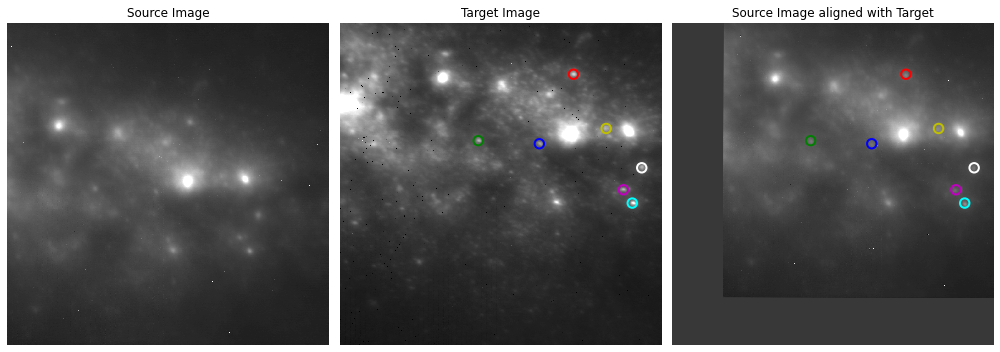

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(14,9))

colors = ['r', 'g', 'b', 'y', 'cyan', 'w', 'm']
vmin,vmax= 100,2900
axes[0].imshow(original_images[30], cmap='gray', vmin=vmin,vmax=vmax,interpolation='none', origin='lower')
axes[0].axis('off')
axes[0].set_title("Source Image")
#for (xp, yp), c in zip(pos_img[:len(colors)], colors):
    #circ = plt.Circle((xp, yp), 15, fill=False, edgecolor=c, linewidth=2)
    #axes[0].add_patch(circ)
vmin,vmax= 100,2900
axes[1].imshow(reference, cmap='gray', vmin=vmin,vmax=vmax, interpolation='none', origin='lower')
axes[1].axis('off')
axes[1].set_title("Target Image")
for (xp, yp), c in zip(pos_img_rot[:len(colors)], colors):
    circ = plt.Circle((xp, yp), 15 * p.scale, fill=False, edgecolor=c, linewidth=2)
    axes[1].add_patch(circ)
vmin,vmax= 100,2900
axes[2].imshow(register_image[30], cmap='gray', vmin=vmin,vmax=vmax, interpolation='none', origin='lower')
axes[2].axis('off')
axes[2].set_title("Source Image aligned with Target")
for (xp, yp), c in zip(pos_img_rot[:len(colors)], colors):
    circ = plt.Circle((xp, yp), 15 * p.scale, fill=False, edgecolor=c, linewidth=2)
    axes[2].add_patch(circ)

axes[2].axis('off')

plt.tight_layout()

**Final step: SAVE THEM!**

In [33]:
from astropy.io import fits
from astropy.io.fits import update

In [34]:
#"President {}: {}".format(i + 1, presidents[i])
#for num, name in enumerate(presidents, start=1):
    #print("President {}: {}".format(num, name))

In [43]:
%cd /Users/alba/Desktop/ESO/Data/KOA_118904/NIRC2/calibrated/K_aligned/

# A new FITS file to contain the registered image is created 
for i in range(len(file_original_image)-1):
    hdu = fits.PrimaryHDU(register_image[i])
    hdul = fits.HDUList([hdu])
    hdul.writeto('A_'+str(file_original_image[i]),overwrite='yes') # A warning raises when the file already exits
    update('A_'+ str(file_original_image[i]), register_image[i], original_headers[i])

/Users/alba/Desktop/ESO/Data/KOA_118904/NIRC2/calibrated/K_aligned
